<a href="https://colab.research.google.com/github/mahmud-nobe/CS112-Final-Project/blob/master/CS112_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
install.packages("Matching")
#! M: I installed the package already. So no need to run it again
library(Matching)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Loading required package: MASS
## 
##  Matching (Version 4.9-6, Build Date: 2019-04-07)
##  See http://sekhon.berkeley.edu/matching for additional documentation.
##  Please cite software as:
##   Jasjeet S. Sekhon. 2011. ``Multivariate and Propensity Score Matching
##   Software with Automated Balance Optimization: The Matching package for R.''
##   Journal of Statistical Software, 42(7): 1-52. 
##



### Loading The Dataset

 This is what I did in my Rstudio to get the dataset in csv :



> `dataset = load("tables1to5.RData")`
 
 > `dataset`

> `# 'x'`

> `final.data = x`

> `head(final.data)`

> `write.csv(final.data, "tables1to5.csv")`



Then I upload it in github.

In [0]:
url = "https://raw.githubusercontent.com/mahmud-nobe/CS112-Final-Project/master/tables1to5.csv"
data = read.csv(url)

In [13]:
head(data)

X,year,stateuni,ipop,imale,pcr_prop,pcr_order,pcr_econ,pmurder,pcr_womtot,⋯,lpstrape,lpstpoa,lpstpcr,lparrest_womcrime,lparrest_rape,lparrest_womgirl,lparrest_nonwomen,lparrest_kidmen,lpmurder_m,lpmurder_f
<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1985,ANDHRA PRADESH,58733007,29755186,0.3701837,0.01159484,0.12194166,0.02943830,0.06718931,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,1986,ANDHRA PRADESH,60028840,30416752,0.3218286,0.05244146,0.03141823,0.02663720,0.06629049,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,1987,ANDHRA PRADESH,61324674,31078317,0.3477393,0.01025688,0.14506397,0.02868340,0.05174177,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,1988,ANDHRA PRADESH,62620508,31739883,0.4270326,0.08220949,0.04052985,0.03265704,0.06434455,⋯,NA,NA,NA,-2.295828,-4.422112,-4.599128,-4.339221,-5.081269,NA,NA
5,1989,ANDHRA PRADESH,63916341,32401449,0.4614939,0.08195087,0.04596633,0.03595325,0.07145828,⋯,NA,NA,NA,-2.153817,-4.284273,-4.445257,-4.302086,-4.809580,NA,NA
6,1990,ANDHRA PRADESH,65212174,33063015,0.4658639,0.08265328,0.04235406,0.04003854,0.05710880,⋯,NA,NA,NA,-2.437914,-4.500610,-4.538616,-4.560318,-4.442914,NA,NA


In [14]:
colnames(data)

[1] "X"                   "year"                "stateuni"           
 [4] "ipop"                "imale"               "pcr_prop"           
 [7] "pcr_order"           "pcr_econ"            "pmurder"            
[10] "pcr_womtot"          "pwomgirl"            "prape2"             
[13] "pkidmen"             "majstate"            "elec_womres"        
[16] "elec_scres"          "chargesheet_rate"    "wwinner"            
[19] "wwinclose5"          "murder_m"            "murder_f"           
[22] "postwres"            "postscres"           "plit"               
[25] "pwlit"               "prural"              "pfarm"              
[28] "pfemale"             "womancm"             "ppol_strength"      
[31] "parrest_womcrime"    "parrest_nonwomen"    "parrest_rape"       
[34] "parrest_womgirl"     "parrest_kidmen"      "charge_womcrime"    
[37] "pcgsdp"              "psuic_m"             "psuic_f"            
[40] "pmurder_love"        "sh_murder_lovedowry" "stateid"            
[43] "yearofres"           "pscmurder"           "pscrape"            
[46] "pscpcr"              "pscpoa"              "psctot"             
[49] "pstmurder"           "pstrape"             "pstpcr"             
[52] "pstpoa"              "psttot"              "lpcr_womtot"        
[55] "lprape2"             "lpwomgirl"           "lpkidmen"           
[58] "lpcr_prop"           "lpcr_order"          "lpcr_econ"          
[61] "lpmurder"            "lpmurder_love"       "lpsuic_f"           
[64] "lpsuic_m"            "lpsctot"             "lpscmurder"         
[67] "lpscrape"            "lpscpoa"             "lpscpcr"            
[70] "lpsttot"             "lpstmurder"          "lpstrape"           
[73] "lpstpoa"             "lpstpcr"             "lparrest_womcrime"  
[76] "lparrest_rape"       "lparrest_womgirl"    "lparrest_nonwomen"  
[79] "lparrest_kidmen"     "lpmurder_m"          "lpmurder_f"

 Factor w/ 17 levels "ANDHRA PRADESH",..: 1 1 1 1 1 1 1 1 1 1 ...


In [18]:
data$newstateid<-as.character(data$stateid)
head(data$stateid)
head(data$newstateid)

[1] ANDHRA PRADESH ANDHRA PRADESH ANDHRA PRADESH ANDHRA PRADESH ANDHRA PRADESH
[6] ANDHRA PRADESH
17 Levels: ANDHRA PRADESH ASSAM BIHAR GUJARAT HARYANA ... WEST BENGAL

[1] "ANDHRA PRADESH" "ANDHRA PRADESH" "ANDHRA PRADESH" "ANDHRA PRADESH"
[5] "ANDHRA PRADESH" "ANDHRA PRADESH"

In [20]:
summary(data$stateid)
summary(data$newstateid)

ANDHRA PRADESH            ASSAM            BIHAR          GUJARAT 
              23               23               23               23 
         HARYANA HIMACHAL PRADESH  JAMMU & KASHMIR        KARNATAKA 
              23               23               23               23 
          KERALA   MADHYA PRADESH      MAHARASHTRA           ORISSA 
              23               23               23               23 
          PUNJAB        RAJASTHAN       TAMIL NADU    UTTAR PRADESH 
              23               23               23               23 
     WEST BENGAL 
              23

   Length     Class      Mode 
      391 character character 

In [0]:
kidnapdat <- data[!is.na(data$lpwomgirl),]
head(kidnapdat)

,X,year,stateuni,ipop,imale,pcr_prop,pcr_order,pcr_econ,pmurder,pcr_womtot,⋯,lpstpoa,lpstpcr,lparrest_womcrime,lparrest_rape,lparrest_womgirl,lparrest_nonwomen,lparrest_kidmen,lpmurder_m,lpmurder_f,newstateid
,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
4,4,1988,ANDHRA PRADESH,62620508,31739883,0.4270326,0.08220949,0.04052985,0.03265704,0.06434455,⋯,NA,NA,-2.295828,-4.422112,-4.599128,-4.339221,-5.081269,NA,NA,ANDHRA PRADESH
5,5,1989,ANDHRA PRADESH,63916341,32401449,0.4614939,0.08195087,0.04596633,0.03595325,0.07145828,⋯,NA,NA,-2.153817,-4.284273,-4.445257,-4.302086,-4.809580,NA,NA,ANDHRA PRADESH
6,6,1990,ANDHRA PRADESH,65212174,33063015,0.4658639,0.08265328,0.04235406,0.04003854,0.05710880,⋯,NA,NA,-2.437914,-4.500610,-4.538616,-4.560318,-4.442914,NA,NA,ANDHRA PRADESH
7,7,1991,ANDHRA PRADESH,66508008,33724581,0.4643651,0.08095266,0.03656703,0.04200998,0.05206899,⋯,NA,NA,-2.519523,-4.307137,-4.853174,-4.567579,-4.507932,NA,NA,ANDHRA PRADESH
8,8,1992,ANDHRA PRADESH,67478208,34204864,0.4310428,0.05782608,0.04610377,0.04119848,0.05358644,⋯,NA,-5.36643,-2.420243,-4.157317,-4.588682,-4.415912,-4.824294,NA,NA,ANDHRA PRADESH
9,9,1993,ANDHRA PRADESH,68448408,34685147,0.4042461,0.04755406,0.04476364,0.03672839,0.06021338,⋯,NA,-6.77180,-2.315200,-4.102978,-4.623577,-4.374476,-5.149900,NA,NA,ANDHRA PRADESH


In [0]:
# define clustered standard errors function
cl <- function(dat,fm, cluster) {
  require(sandwich, quietly = TRUE)
  require(lmtest, quietly = TRUE)
  M <- length(unique(cluster))
  N <- length(cluster)
  K <- fm$rank
  dfc <- (M/(M-1))*((N-1)/(N-K))
  uj  <- apply(estfun(fm),2, function(x) tapply(x, cluster, sum))
  vcovCL <- dfc*sandwich(fm, meat=crossprod(uj)/N)
  return(list(coeftest(fm, vcovCL), n=round(length(fm$fitted.values),0), rsq=round(summary(fm)$r.squared,2)))
}

In [0]:
# fix data formatting issues and subset kidnapping data so that cl function will work
data$newstateid <- as.character(data$stateid) 
#! Mahmud: I just copied their code. Mistakenly they run this line again w/o any reason

In [0]:
#Creating a reservation year variable
data$year.res<-NULL
data$year.res[data$stateid == 'ANDHRA PRADESH']<-1995
data$year.res[data$stateid == 'ASSAM']<-2002
data$year.res[data$stateid == 'BIHAR']<-2001
data$year.res[data$stateid == 'GUJARAT']<-1995
data$year.res[data$stateid == 'HARYANA']<-1995
data$year.res[data$stateid == 'HIMACHAL PRADESH']<-1995
data$year.res[data$stateid == 'JAMMU & KASHMIR']<-2001
data$year.res[data$stateid == 'KARNATAKA']<-1987
data$year.res[data$stateid == 'KERALA']<-1991
data$year.res[data$stateid == 'MADHYA PRADESH']<-1994
data$year.res[data$stateid == 'MAHARASHTRA']<-1992
data$year.res[data$stateid == 'ORISSA']<-1992
data$year.res[data$stateid == 'PUNJAB']<-1994
data$year.res[data$stateid == 'RAJASTHAN']<-1995
data$year.res[data$stateid == 'TAMIL NADU']<-1996
data$year.res[data$stateid == 'UTTAR PRADESH']<-2006
data$year.res[data$stateid == 'WEST BENGAL']<-1993

In [0]:
##TABLE 2
##Duration model

# install.packages("survival")
#! M: I installed the package already. So no need to run it again
library(survival)
library(splines)


In [0]:
#install.packages("stargazer")
#! M: I installed the package already. So no need to run it again
library(stargazer)

In [0]:
#Generating a new dataset with all variables at their 1985 values
newdata <- data[which(data$year==1985),]

Date.imp <-survreg(Surv(newdata$year.res)~ newdata$pcgsdp  + newdata$pfemale + newdata$plit + newdata$pwlit + newdata$prural, data=newdata, dist="weibull")
summary(Date.imp)
stargazer(Date.imp, covariate.labels = c("GDP per capita", "Female-male ratio", "Literacy", "Womens literacy", "Percent rural"), title = "Duration model predicting time to state level implementation of the national reservation policy",
          column.labels="Reservation implementation year")



Call:
survreg(formula = Surv(newdata$year.res) ~ newdata$pcgsdp + newdata$pfemale + 
    newdata$plit + newdata$pwlit + newdata$prural, data = newdata, 
    dist = "weibull")
                   Value Std. Error      z      p
(Intercept)      7.62836    0.01621 470.53 <2e-16
newdata$pcgsdp  -0.00169    0.00134  -1.26  0.209
newdata$pfemale -0.03294    0.01436  -2.29  0.022
newdata$plit    -0.00931    0.03319  -0.28  0.779
newdata$pwlit    0.00884    0.02897   0.31  0.760
newdata$prural   0.00635    0.00612   1.04  0.299
Log(scale)      -6.50433    0.18870 -34.47 <2e-16

Scale= 0.0015 

Weibull distribution
Loglik(model)= -44.9   Loglik(intercept only)= -52.2
	Chisq= 14.49 on 5 degrees of freedom, p= 0.013 
Number of Newton-Raphson Iterations: 6 
n= 17 



% Table created by stargazer v.5.2.2 by Marek Hlavac, Harvard University. E-mail: hlavac at fas.harvard.edu
% Date and time: Mon, Nov 18, 2019 - 12:37:36 PM
\begin{table}[!htbp] \centering 
  \caption{Duration model predicting time to state level implementation of the national reservation policy} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{1}{c}{\textit{Dependent variable:}} \\ 
\cline{2-2} 
\\[-1.8ex] & year.res \\ 
 & Reservation implementation year \\ 
\hline \\[-1.8ex] 
 GDP per capita & $-$0.002 \\ 
  & (0.001) \\ 
  & \\ 
 Female-male ratio & $-$0.033$^{**}$ \\ 
  & (0.014) \\ 
  & \\ 
 Literacy & $-$0.009 \\ 
  & (0.033) \\ 
  & \\ 
 Womens literacy & 0.009 \\ 
  & (0.029) \\ 
  & \\ 
 Percent rural & 0.006 \\ 
  & (0.006) \\ 
  & \\ 
 Constant & 7.628$^{***}$ \\ 
  & (0.016) \\ 
  & \\ 
\hline \\[-1.8ex] 
Observations & 17 \\ 
Log Likelihood & $-$44.935 \\ 
$\chi^{2}$ & 14.494$^{**}$ (df = 5) \\ 
\hline 
\hline \\[

### Table 2:
I copy paste the above latex code to a latex editor and copy the picture to the github and add the link here.

#### Maybe Rstudio can create a Table in itself. Not sure as I didn't check.

![Table 1](https://github.com/mahmud-nobe/CS112-Final-Project/raw/master/table%201.png)

In [0]:
##################################################################
##TABLE 1
#Analysis of the data in Iyer et al. on and after 1995 in states where the reservation policy was implemented in 1995 and after

#Subsetting data to years post-1994 and reservation post-1994
better.data <- data[which(data$year.res>=1995),]
better.data <- data[which(better.data$year>=1995),]
# View(better.data)
head(better.data)

,X,year,stateuni,ipop,imale,pcr_prop,pcr_order,pcr_econ,pmurder,pcr_womtot,⋯,lpstpcr,lparrest_womcrime,lparrest_rape,lparrest_womgirl,lparrest_nonwomen,lparrest_kidmen,lpmurder_m,lpmurder_f,newstateid,year.res
,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
11,11,1995,ANDHRA PRADESH,70388808,35645714,0.3257336,0.08722978,0.04314606,0.03511922,0.2424079,⋯,-6.472419,-1.0180211,-4.185441,-4.740167,-4.340173,-4.385282,NA,NA,ANDHRA PRADESH,1995
12,12,1996,ANDHRA PRADESH,71359008,36125997,0.3057217,0.07088103,0.04721198,0.03656161,0.2523769,⋯,-6.826934,-0.8874900,-4.191689,-4.060709,-4.282272,-4.906383,NA,NA,ANDHRA PRADESH,1995
13,13,1997,ANDHRA PRADESH,72329207,36606280,0.3230230,0.06644619,0.06015550,0.03970733,0.2805201,⋯,-6.662335,-0.8064592,-3.962047,-4.418194,-4.405653,-4.719733,NA,NA,ANDHRA PRADESH,1995
14,14,1998,ANDHRA PRADESH,73299407,37086563,0.3350914,0.07862274,0.06476178,0.04054603,0.2887097,⋯,-6.274284,-0.7321394,-4.166159,-4.553323,-5.081213,-4.785575,NA,NA,ANDHRA PRADESH,1995
15,15,1999,ANDHRA PRADESH,74269607,37566847,0.3073532,0.05264603,0.07184635,0.03650214,0.3282587,⋯,-6.542715,-0.6780251,-4.060061,-4.375981,-4.902295,-4.361103,-2.87896,-3.994414,ANDHRA PRADESH,1995
16,16,2000,ANDHRA PRADESH,75239807,38047130,0.3260641,0.04444456,0.07518627,0.03593842,0.3652063,⋯,-6.713694,-0.5703521,-4.099138,-4.536352,-4.708059,-4.693194,NA,NA,ANDHRA PRADESH,1995


In [0]:
#Running the initial model with post-1995 data, column 1
better.data$newstateid<-as.character(better.data$stateid)
new.column1<-lm(better.data$lpcr_womtot ~ better.data$postwres + factor(better.data$year) + factor(better.data$newstateid), subset=(better.data$majstate==1))
summary(new.column1)



Call:
lm(formula = better.data$lpcr_womtot ~ better.data$postwres + 
    factor(better.data$year) + factor(better.data$newstateid), 
    subset = (better.data$majstate == 1))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.91519 -0.08505  0.00088  0.10176  0.69992 

Coefficients:
                                               Estimate Std. Error t value
(Intercept)                                    -1.75246    0.13425 -13.054
better.data$postwres                            0.20821    0.09751   2.135
factor(better.data$year)1996                    0.38270    0.11513   3.324
factor(better.data$year)1997                    0.49516    0.11513   4.301
factor(better.data$year)1998                    0.56664    0.11513   4.922
factor(better.data$year)1999                    0.58801    0.11513   5.107
factor(better.data$year)2000                    0.60838    0.11513   5.284
factor(better.data$year)2001                    0.62751    0.11677   5.374
factor(better.data$year)2002  

In [0]:
# these two packages are necessary to run the next lines of code

# install.packages("sandwich")
library(sandwich)

# install.packages("lmtest")
library(lmtest)

In [0]:
column1.cl<- cl(better.data, new.column1, better.data$newstateid)
column1.cl

[[1]]

t test of coefficients:

                                                  Estimate  Std. Error
(Intercept)                                    -1.7525e+00  2.1831e-01
better.data$postwres                            2.0821e-01  1.1064e-01
factor(better.data$year)1996                    3.8270e-01  2.7883e-01
factor(better.data$year)1997                    4.9516e-01  2.8622e-01
factor(better.data$year)1998                    5.6664e-01  2.9932e-01
factor(better.data$year)1999                    5.8801e-01  2.9469e-01
factor(better.data$year)2000                    6.0838e-01  2.8010e-01
factor(better.data$year)2001                    6.2751e-01  2.8098e-01
factor(better.data$year)2002                    6.9596e-01  2.7692e-01
factor(better.data$year)2003                    6.4287e-01  2.9687e-01
factor(better.data$year)2004                    6.9375e-01  3.0588e-01
factor(better.data$year)2005                    6.7132e-01  3.0401e-01
factor(better.data$year)2006                 

In [0]:
#Running the initial model with post-1995 data, column 6
better.data$newstateid<-as.character(better.data$stateid)
new.total.crimes<-lm(better.data$lpcr_womtot ~ better.data$postwres + better.data$newstateid:better.data$year + better.data$pfemale + better.data$prural + better.data$plit + better.data$pfarm + better.data$womancm + better.data$pcgsdp + better.data$ppol_strengt +
              factor(better.data$year) + factor(better.data$newstateid), subset=(better.data$year>=1985 & better.data$majstate==1))
summary(new.total.crimes)


Call:
lm(formula = better.data$lpcr_womtot ~ better.data$postwres + 
    better.data$newstateid:better.data$year + better.data$pfemale + 
    better.data$prural + better.data$plit + better.data$pfarm + 
    better.data$womancm + better.data$pcgsdp + better.data$ppol_strengt + 
    factor(better.data$year) + factor(better.data$newstateid), 
    subset = (better.data$year >= 1985 & better.data$majstate == 
        1))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.05213 -0.09026 -0.00074  0.07835  0.65888 

Coefficients: (1 not defined because of singularities)
                                                          Estimate Std. Error
(Intercept)                                             1402.59546  394.19170
better.data$postwres                                      -0.04511    0.16137
better.data$pfemale                                     -925.37030  199.53770
better.data$prural                                      -103.07092   91.62905
better.data$plit             

In [0]:
column2.cl<- cl(better.data, new.total.crimes, better.data$newstateid)
column2.cl

[[1]]

t test of coefficients:

                                                           Estimate  Std. Error
(Intercept)                                             1402.595459  878.371843
better.data$postwres                                      -0.045107    0.109138
better.data$pfemale                                     -925.370299  483.936102
better.data$prural                                      -103.070923  191.481139
better.data$plit                                        -154.680564   87.696643
better.data$pfarm                                       -368.734630  250.140219
better.data$womancm                                        0.103807    0.119418
better.data$pcgsdp                                         1.089607    1.016926
better.data$ppol_strengt                                  -0.022301    0.079896
factor(better.data$year)1996                               0.783919    0.841481
factor(better.data$year)1997                               1.362176    1.619231
factor(b

In [0]:
#Table 3 column 1 code for total crimes against women in Iyer
model1w<-lm(data$lpcr_womtot ~ data$postwres +  
              factor(data$year) + factor(data$newstateid), subset=(data$year>=1985 & data$majstate==1))
summary(model1w)


Call:
lm(formula = data$lpcr_womtot ~ data$postwres + factor(data$year) + 
    factor(data$newstateid), subset = (data$year >= 1985 & data$majstate == 
    1))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.82621 -0.21707  0.00651  0.25783  1.56950 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                             -3.14521    0.15331 -20.515  < 2e-16
data$postwres                            0.36511    0.09573   3.814 0.000162
factor(data$year)1986                    0.15913    0.16649   0.956 0.339817
factor(data$year)1987                    0.12377    0.16658   0.743 0.457995
factor(data$year)1988                    0.27887    0.16658   1.674 0.095012
factor(data$year)1989                    0.36170    0.16658   2.171 0.030579
factor(data$year)1990                    0.30469    0.16658   1.829 0.068237
factor(data$year)1991                    0.25821    0.16687   1.547 0.122674
factor(data$year)1992      

In [0]:
model1cw<- cl(data, model1w, data$newstateid)
model1cw

[[1]]

t test of coefficients:

                                           Estimate  Std. Error     t value
(Intercept)                             -3.1452e+00  2.3829e-01 -1.3199e+01
data$postwres                            3.6511e-01  1.9031e-01  1.9185e+00
factor(data$year)1986                    1.5913e-01  1.5517e-01  1.0255e+00
factor(data$year)1987                    1.2377e-01  1.7864e-01  6.9280e-01
factor(data$year)1988                    2.7887e-01  1.8055e-01  1.5446e+00
factor(data$year)1989                    3.6170e-01  2.0170e-01  1.7933e+00
factor(data$year)1990                    3.0469e-01  2.2600e-01  1.3482e+00
factor(data$year)1991                    2.5821e-01  2.0731e-01  1.2455e+00
factor(data$year)1992                    2.8438e-01  2.0276e-01  1.4026e+00
factor(data$year)1993                    3.2019e-01  2.1805e-01  1.4684e+00
factor(data$year)1994                    2.7934e-01  2.5292e-01  1.1045e+00
factor(data$year)1995                    1.4761e+00  3.0

In [0]:
# Table 3 column 6 code for total crimes against women in Iyer
model6w<-lm(data$lpcr_womtot ~ data$postwres + data$newstateid:data$year + data$pfemale + data$prural + data$plit + data$pfarm + data$womancm + data$pcgsdp + data$ppol_strengt +
              factor(data$year) + factor(data$newstateid), subset=(data$year>=1985 & data$majstate==1))
summary(model6w)


Call:
lm(formula = data$lpcr_womtot ~ data$postwres + data$newstateid:data$year + 
    data$pfemale + data$prural + data$plit + data$pfarm + data$womancm + 
    data$pcgsdp + data$ppol_strengt + factor(data$year) + factor(data$newstateid), 
    subset = (data$year >= 1985 & data$majstate == 1))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.87459 -0.11660 -0.00157  0.12497  0.70362 

Coefficients: (1 not defined because of singularities)
                                            Estimate Std. Error t value
(Intercept)                               -1.815e+01  5.308e+01  -0.342
data$postwres                              2.288e-01  6.158e-02   3.716
data$pfemale                              -2.046e+01  1.045e+01  -1.958
data$prural                                1.184e+01  4.436e+00   2.668
data$plit                                 -2.896e+00  3.615e+00  -0.801
data$pfarm                                 1.615e+01  6.929e+00   2.331
data$womancm                           

In [0]:
model6cw<- cl(data, model6w, data$newstateid)
model6cw

[[1]]

t test of coefficients:

                                             Estimate  Std. Error t value
(Intercept)                               -1.8151e+01  9.9215e+01 -0.1829
data$postwres                              2.2885e-01  8.4441e-02  2.7102
data$pfemale                              -2.0461e+01  1.8347e+01 -1.1153
data$prural                                1.1835e+01  7.0727e+00  1.6734
data$plit                                 -2.8955e+00  5.1406e+00 -0.5633
data$pfarm                                 1.6149e+01  1.3363e+01  1.2085
data$womancm                              -6.4402e-02  7.0851e-02 -0.9090
data$pcgsdp                               -1.8927e-01  1.0245e-01 -1.8474
data$ppol_strengt                         -9.1816e-02  5.3947e-02 -1.7020
factor(data$year)1986                      2.0723e-01  1.5085e-01  1.3737
factor(data$year)1987                      2.4650e-01  1.8910e-01  1.3036
factor(data$year)1988                      4.4976e-01  1.9259e-01  2.3352
factor

In [0]:
# Outputting the results from the model restricted to post-1995
table2.1<-as.matrix(c(round(column1.cl[[1]]["better.data$postwres",1],3),paste("[",round(column1.cl[[1]]["better.data$postwres",2],3),"]"),round(column1.cl[[3]],2), round(column1.cl[[2]],0) ))
table2.2<-as.matrix(c(round(column2.cl[[1]]["better.data$postwres",1],3),paste("[",round(column2.cl[[1]]["better.data$postwres",2],3),"]"),round(column2.cl[[3]],2), round(column2.cl[[2]],0) ))
table2.3<-as.matrix(c(round(model1cw[[1]]["data$postwres",1],3),paste("[",round(model1cw[[1]]["data$postwres",2],3),"]"),round(model1cw[[3]],2), round(model1cw[[2]],0) ))
table2.4<-as.matrix(c(round(model6cw[[1]]["data$postwres",1],3),paste("[",round(model6cw[[1]]["data$postwres",2],3),"]"),round(model6cw[[3]],2), round(model6cw[[2]],0) ))

In [0]:
table2_out <- matrix(NA,nrow=8,ncol=2)
table2_out[1:4,1] <- table2.1
table2_out[1:4,2] <- table2.2
table2_out[5:8,1] <- table2.3
table2_out[5:8,2] <- table2.4

In [0]:
colnames(table2_out) <- c("No controls (1)", "Control for state-specific time trends + other controls (2)")
rownames(table2_out)<- c("Total crimes against women per 1,000 women", "", "R2", "Observations",
                         "Total crimes against women per 1,000 women", "", "R2", "Observations")

print(table2_out)


                                           No controls (1)
Total crimes against women per 1,000 women "0.208"        
                                           "[ 0.111 ]"    
R2                                         "0.76"         
Observations                               "130"          
Total crimes against women per 1,000 women "0.365"        
                                           "[ 0.19 ]"     
R2                                         "0.85"         
Observations                               "391"          
                                           Control for state-specific time trends + other controls (2)
Total crimes against women per 1,000 women "-0.045"                                                   
                                           "[ 0.109 ]"                                                
R2                                         "0.88"                                                     
Observations                               "130"         

### Table 2:
I copy paste the above latex code to a latex editor and copy the picture to the github and add the link here.

#### Maybe Rstudio can create a Table in itself. Not sure as I didn't check.

![Table 2](https://github.com/mahmud-nobe/CS112-Final-Project/raw/master/table%202.png)

In [0]:
library(stargazer)
stargazer(table2_out,title="Women's Political Representation and Crimes against Women")



% Table created by stargazer v.5.2.2 by Marek Hlavac, Harvard University. E-mail: hlavac at fas.harvard.edu
% Date and time: Mon, Nov 18, 2019 - 12:37:44 PM
\begin{table}[!htbp] \centering 
  \caption{Women's Political Representation and Crimes against Women} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}} ccc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & No controls (1) & Control for state-specific time trends + other controls (2) \\ 
\hline \\[-1.8ex] 
Total.crimes.against.women.per.1.000.women & 0.208 & -0.045 \\ 
X & [ 0.111 ] & [ 0.109 ] \\ 
R2 & 0.76 & 0.88 \\ 
Observations & 130 & 130 \\ 
Total.crimes.against.women.per.1.000.women.1 & 0.365 & 0.229 \\ 
X.1 & [ 0.19 ] & [ 0.084 ] \\ 
R2.1 & 0.85 & 0.95 \\ 
Observations.1 & 391 & 391 \\ 
\hline \\[-1.8ex] 
\end{tabular} 
\end{table} 


In [0]:
##################################
##Code for Figures 2-5
##################################

In [0]:
require(foreign)

In [0]:
tables1to5 <- read.csv(url)
#! their original code:
#! tables1to5<-as.data.frame(read.dta('tables1to5.dta'))

tables1to5$newstateid<-as.character(tables1to5$stateid)
tables1to5$numid<-as.numeric(factor(tables1to5$newstateid))

data <-tables1to5

In [0]:
head(data)

X,year,stateuni,ipop,imale,pcr_prop,pcr_order,pcr_econ,pmurder,pcr_womtot,⋯,lpstpcr,lparrest_womcrime,lparrest_rape,lparrest_womgirl,lparrest_nonwomen,lparrest_kidmen,lpmurder_m,lpmurder_f,newstateid,numid
<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,1985,ANDHRA PRADESH,58733007,29755186,0.3701837,0.01159484,0.12194166,0.02943830,0.06718931,⋯,NA,NA,NA,NA,NA,NA,NA,NA,ANDHRA PRADESH,1
2,1986,ANDHRA PRADESH,60028840,30416752,0.3218286,0.05244146,0.03141823,0.02663720,0.06629049,⋯,NA,NA,NA,NA,NA,NA,NA,NA,ANDHRA PRADESH,1
3,1987,ANDHRA PRADESH,61324674,31078317,0.3477393,0.01025688,0.14506397,0.02868340,0.05174177,⋯,NA,NA,NA,NA,NA,NA,NA,NA,ANDHRA PRADESH,1
4,1988,ANDHRA PRADESH,62620508,31739883,0.4270326,0.08220949,0.04052985,0.03265704,0.06434455,⋯,NA,-2.295828,-4.422112,-4.599128,-4.339221,-5.081269,NA,NA,ANDHRA PRADESH,1
5,1989,ANDHRA PRADESH,63916341,32401449,0.4614939,0.08195087,0.04596633,0.03595325,0.07145828,⋯,NA,-2.153817,-4.284273,-4.445257,-4.302086,-4.809580,NA,NA,ANDHRA PRADESH,1
6,1990,ANDHRA PRADESH,65212174,33063015,0.4658639,0.08265328,0.04235406,0.04003854,0.05710880,⋯,NA,-2.437914,-4.500610,-4.538616,-4.560318,-4.442914,NA,NA,ANDHRA PRADESH,1


In [0]:

data$year.res<-NULL
data$year.res[data$stateid == 'ANDHRA PRADESH']<-1995
data$year.res[data$stateid == 'ASSAM']<-2002
data$year.res[data$stateid == 'BIHAR']<-2001
data$year.res[data$stateid == 'GUJARAT']<-1995
data$year.res[data$stateid == 'HARYANA']<-1995
data$year.res[data$stateid == 'HIMACHAL PRADESH']<-1995
data$year.res[data$stateid == 'JAMMU & KASHMIR']<-2001
data$year.res[data$stateid == 'KARNATAKA']<-1987
data$year.res[data$stateid == 'KERALA']<-1991
data$year.res[data$stateid == 'MADHYA PRADESH']<-1994
data$year.res[data$stateid == 'MAHARASHTRA']<-1992
data$year.res[data$stateid == 'ORISSA']<-1992
data$year.res[data$stateid == 'PUNJAB']<-1994
data$year.res[data$stateid == 'RAJASTHAN']<-1995
data$year.res[data$stateid == 'TAMIL NADU']<-1996
data$year.res[data$stateid == 'UTTAR PRADESH']<-2006
data$year.res[data$stateid == 'WEST BENGAL']<-1993

In [0]:
data$year.diff<-data$year - data$year.res
data$view.year<-data$year
min(data$year.res)

[1] 1987

In [0]:
data$duration<-data$year.res-1985

In [0]:
#install.packages('ggplot2')
require('ggplot2')


In [0]:
data$res<-"Post"
data$res[data$postwres==0]<-"Pre"


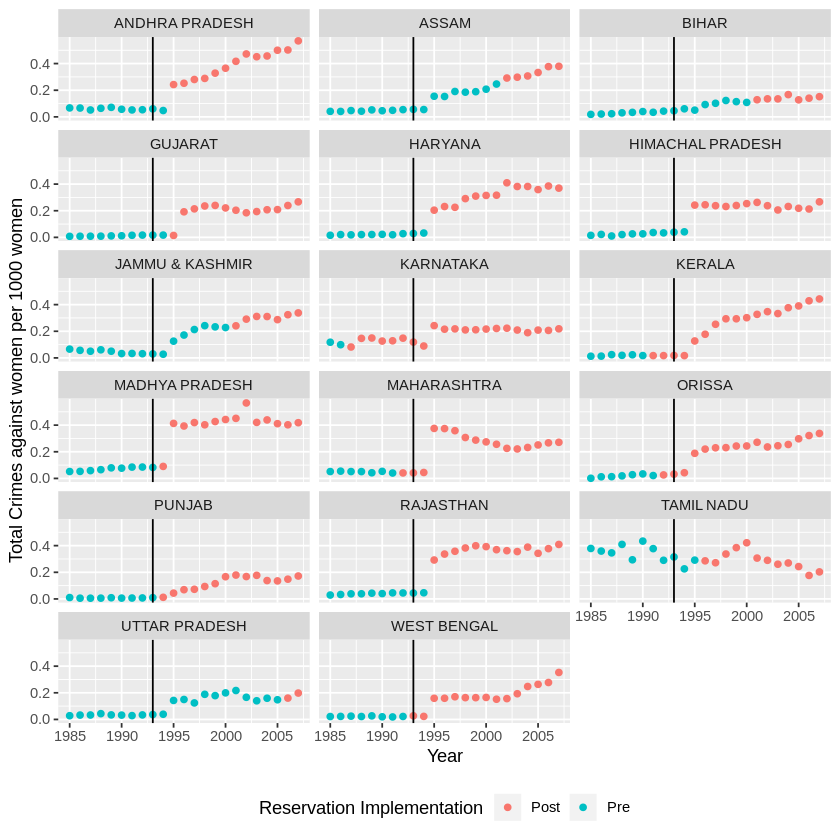

In [0]:
###############################################################
##Figure 2

p<-ggplot(data, aes(y=pcr_womtot, x=year, group=newstateid, colour = factor(res))) + 
  geom_point() +facet_wrap( ~ newstateid, ncol = 3) +geom_vline(xintercept = 1993) +
  xlab("Year")+ ylab("Total Crimes against women per 1000 women") +  
  scale_colour_discrete(name = "Reservation Implementation")+theme(legend.position="bottom")

print(p)

Warning message:
“Removed 51 rows containing missing values (geom_point).”

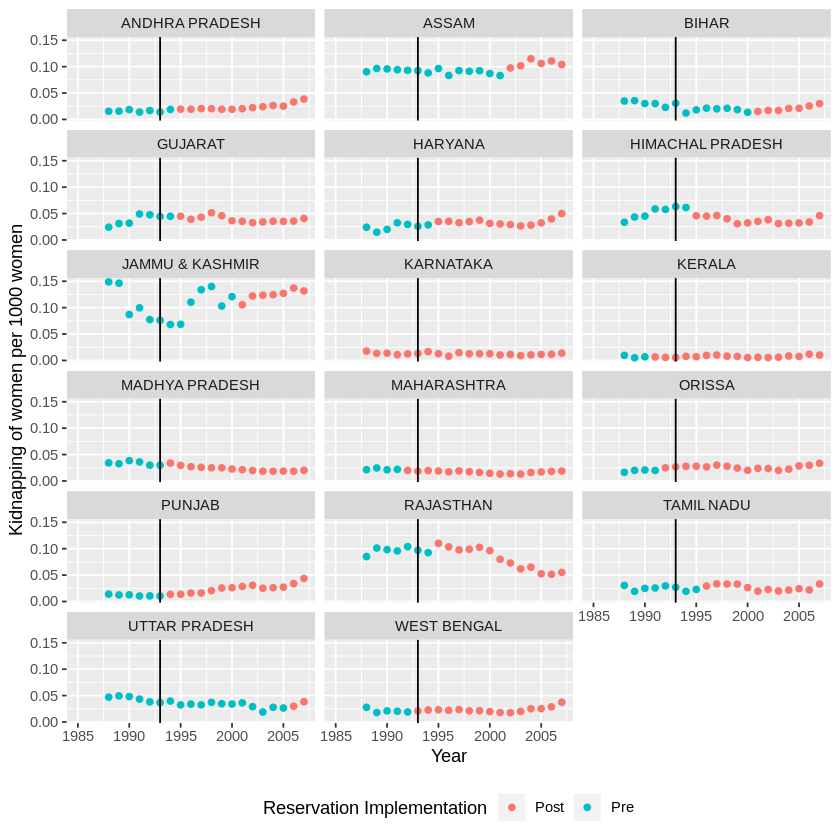

In [0]:
##Figure 3

p1<-ggplot(data, aes(y=pwomgirl, x=year, group=newstateid, colour = factor(res))) + 
  geom_point() +facet_wrap( ~ newstateid, ncol = 3) +geom_vline(xintercept = 1993) +
  xlab("Year")+ ylab("Kidnapping of women per 1000 women") +  
  scale_colour_discrete(name = "Reservation Implementation")+theme(legend.position="bottom")

print(p1)

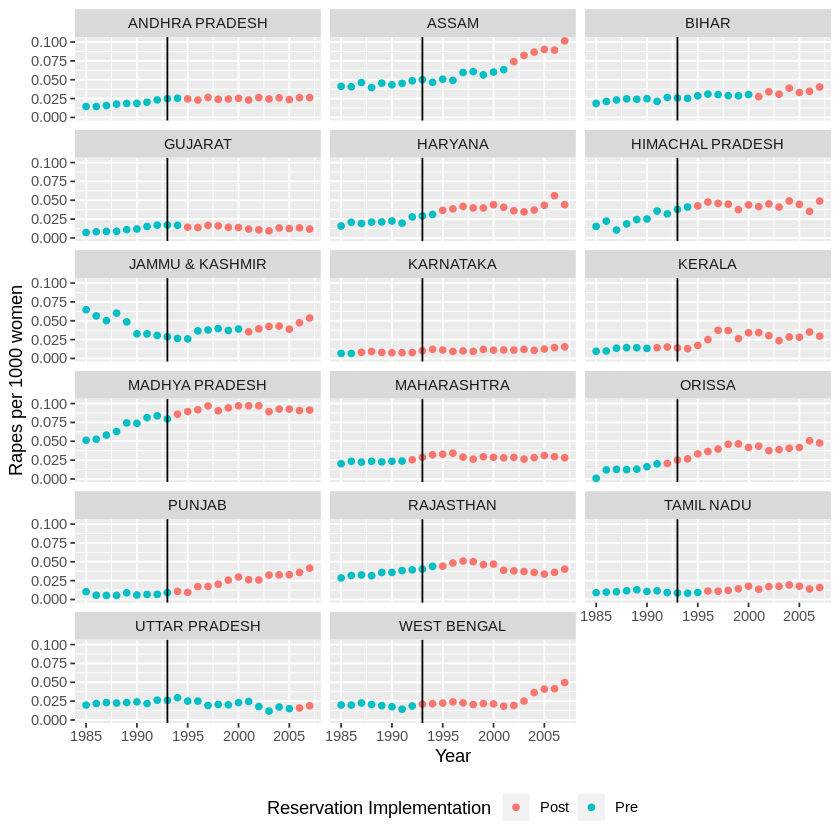

In [0]:
###############################################################
#Figure 4

p2<-ggplot(data, aes(y=prape2, x=year, group=newstateid, colour = factor(res))) + 
  geom_point() +facet_wrap( ~ newstateid, ncol = 3) +geom_vline(xintercept = 1993) +
  xlab("Year")+ ylab("Rapes per 1000 women") +  
  scale_colour_discrete(name = "Reservation Implementation")+theme(legend.position="bottom")

print(p2)

In [0]:
##########################################################
# Figure 5

#############################################################
rm(list=ls())
require('ggplot2')
# new.data <- read.csv("This dataset is not publicly available: Obtained through personal communication with Professor Laxmi Iyer")
# There is no data for figure 5, so it can't be replicated.

# sub<-new.data[new.data$Data<10000,]

## Extension Part:

In [23]:
head(data)

X,year,stateuni,ipop,imale,pcr_prop,pcr_order,pcr_econ,pmurder,pcr_womtot,⋯,lpstpoa,lpstpcr,lparrest_womcrime,lparrest_rape,lparrest_womgirl,lparrest_nonwomen,lparrest_kidmen,lpmurder_m,lpmurder_f,newstateid
<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1985,ANDHRA PRADESH,58733007,29755186,0.3701837,0.01159484,0.12194166,0.02943830,0.06718931,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,ANDHRA PRADESH
2,1986,ANDHRA PRADESH,60028840,30416752,0.3218286,0.05244146,0.03141823,0.02663720,0.06629049,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,ANDHRA PRADESH
3,1987,ANDHRA PRADESH,61324674,31078317,0.3477393,0.01025688,0.14506397,0.02868340,0.05174177,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,ANDHRA PRADESH
4,1988,ANDHRA PRADESH,62620508,31739883,0.4270326,0.08220949,0.04052985,0.03265704,0.06434455,⋯,NA,NA,-2.295828,-4.422112,-4.599128,-4.339221,-5.081269,NA,NA,ANDHRA PRADESH
5,1989,ANDHRA PRADESH,63916341,32401449,0.4614939,0.08195087,0.04596633,0.03595325,0.07145828,⋯,NA,NA,-2.153817,-4.284273,-4.445257,-4.302086,-4.809580,NA,NA,ANDHRA PRADESH
6,1990,ANDHRA PRADESH,65212174,33063015,0.4658639,0.08265328,0.04235406,0.04003854,0.05710880,⋯,NA,NA,-2.437914,-4.500610,-4.538616,-4.560318,-4.442914,NA,NA,ANDHRA PRADESH


In [27]:
summary(as.factor(data$year))

1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 
  17   17   17   17   17   17   17   17   17   17   17   17   17   17   17   17 
2001 2002 2003 2004 2005 2006 2007 
  17   17   17   17   17   17   17

In [28]:
head(data$lpcr_womtot)

[1] -2.700241 -2.713709 -2.961490 -2.743503 -2.638642 -2.862797

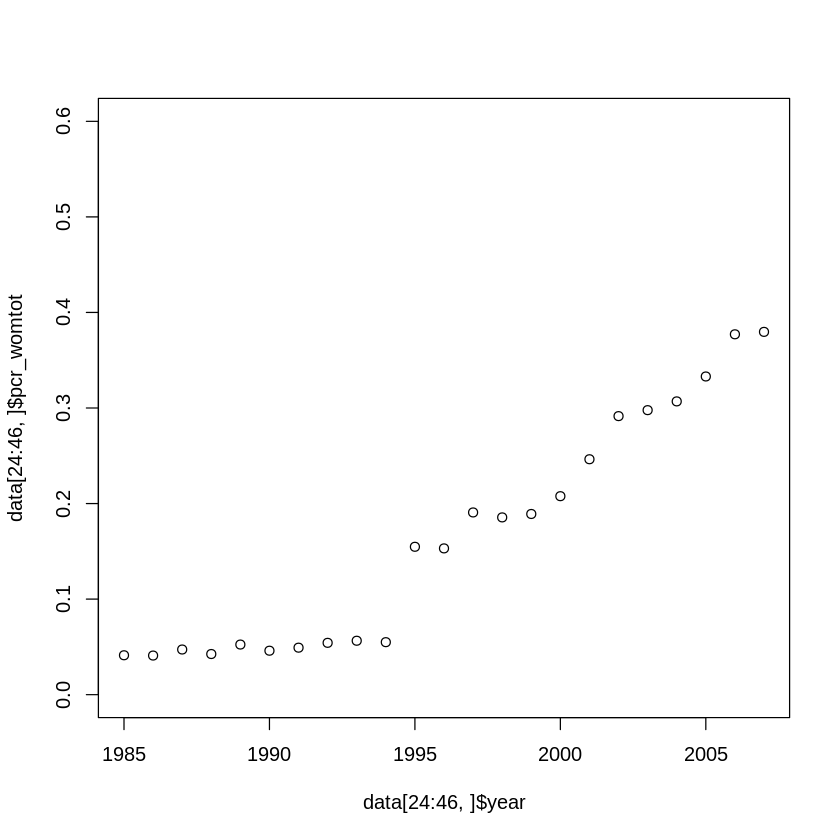

In [37]:
plot(data[24:46, ]$year, data[24:46, ]$pcr_womtot, ylim=c(0,0.6))

In [39]:
head(data$res)

NULL